# Milestone 2 - Exploratory Analysis

This notebook regroups the different plots of the exploratory analysis of our dataset. 

In [1]:
import pandas as pd
import requests
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Colonizing countries

We will first observe which countries were the biggest colonisers over the past centuries. The first common observation is that all of them are european countries.

In [2]:
colonies_df = pd.read_csv('datasets/colonies.csv')

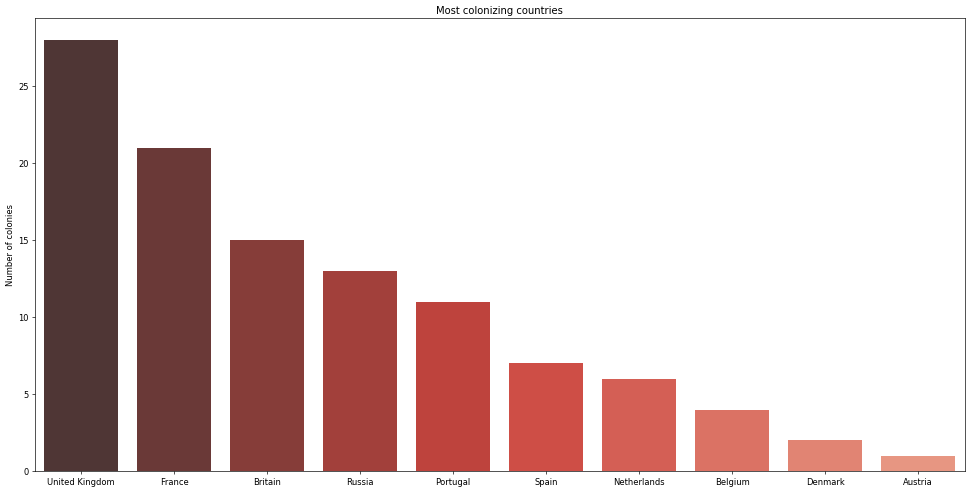

In [9]:
x = np.linspace(0,9,10)
my_xticks = colonies_df['Colonizer Country'].value_counts().index
y = colonies_df['Colonizer Country'].value_counts().values


plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
sns.barplot(x,y,palette="Reds_d")
plt.xticks(x, my_xticks)
plt.ylabel('Number of colonies')
plt.title('Most colonizing countries')
plt.show()

## Decolonisation over time and continent

By looking at the deconolisation dates, we can observe when European Colonisers has lost their grasps on their colonies. (Happening by vague in continents? Communicating between continents? Map of the decolonisation date would be good to look at limitrophs countries)

In [34]:
decolonisation_df = pd.read_csv('datasets/colonies_wikipedia.csv')
decolonisation_df = decolonisation_df[decolonisation_df['Date'] != 'False']
decolonisation_df.head()

,Unnamed: 0,Colonized Country,ID,Date,Colonizer Country,URL
2,3,Canada,CA,1867,United Kingdom,/wiki/Canada
3,4,United States,US,1776,United Kingdom,/wiki/United_States
4,5,Haiti,HT,1804,France,/wiki/Haiti
5,6,Benin,BJ,1960,France,/wiki/Benin
6,7,Algeria,DZ,1962,France,/wiki/Algeria


In [ ]:
x = np.linspace(1776,2017,242)
my_xticks = decolonisation_df['Date'].value_counts().index
y = decolonisation_df['Date'].value_counts().values

plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
sns.barplot(x,y,palette="Reds_d")
plt.xticks(x, my_xticks)
plt.ylabel('Number of colonies')
plt.title('Most colonizing countries')
plt.show()

In [33]:
y = decolonisation_df['Date'].value_counts()
y.head(21)

1960            14
1962             5
1975             5
1991             4
1966             3
1821             3
1968             3
1956             3
1948             3
1918             3
1810             3
1961             3
1971             3
1947             3
1965             2
1825             2
1917             2
1898             2
1949             2
1990             2
(1932-10-03)     1
Name: Date, dtype: int64

## Evolution of conflicts

## Relevant countries examples

### Violently decolonized country - Algeria, Congo, Syria, Vietnam?

### Peacefully decolonized country - India, Lebanon, Philippines?